In [1]:
import pandas as pd
data = pd.read_csv("final_preprocessed_data.csv")
data

,fox headline mentions (log),nyt lead paragraph mentions (log),nyt headline mentions (log),percent total population two or more races white and american indian and alaska native,"percent citizen, voting age population citizen, 18 and over population female","percent citizen, voting age population citizen, 18 and over population male",percent hispanic or latino and total population not hispanic or latino black or african american alone,estimate total population one race asian asian indian (log),percent race alone or in combination with one or more other races total population black or african american,percent total population one race black or african american,...,estimate total population 35 to 44 years,estimate total population (log),estimate total population 16 years and over (log),estimate total population 18 years and over female (log),estimate total population 21 years and over (log),estimate hispanic or latino and total population (log),estimate race alone or in combination with one or more other races total population (log),total_media_mentions (log),citizenship_female_minus_male,won_county
0,0.000000,0.000000,0.000000,0.5,37.1,62.9,20.6,3.295837,22.2,20.9,...,9611.0,10.966783,10.781079,9.750103,10.717391,10.966783,10.966783,0.000000,-25.8,0
1,7.167038,7.686162,7.153834,0.5,37.1,62.9,20.6,3.295837,22.2,20.9,...,9611.0,10.966783,10.781079,9.750103,10.717391,10.966783,10.966783,22.007034,-25.8,0
2,1.098612,0.000000,0.000000,0.5,37.1,62.9,20.6,3.295837,22.2,20.9,...,9611.0,10.966783,10.781079,9.750103,10.717391,10.966783,10.966783,1.098612,-25.8,0
3,0.000000,1.609438,1.098612,0.5,37.1,62.9,20.6,3.295837,22.2,20.9,...,9611.0,10.966783,10.781079,9.750103,10.717391,10.966783,10.966783,2.708050,-25.8,0
4,7.872074,8.471359,8.243283,0.5,37.1,62.9,20.6,3.295837,22.2,20.9,...,9611.0,10.966783,10.781079,9.750103,10.717391,10.966783,10.966783,24.586715,-25.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884746,7.167038,7.686162,7.153834,2.9,49.6,50.4,3.3,5.480639,5.9,3.4,...,9901.0,11.258356,10.969284,10.235198,10.887250,11.258356,11.258356,22.007034,-0.8,0
884747,0.000000,1.609438,1.098612,2.9,49.6,50.4,3.3,5.480639,5.9,3.4,...,9901.0,11.258356,10.969284,10.235198,10.887250,11.258356,11.258356,2.708050,-0.8,0
884748,1.098612,0.000000,0.000000,2.9,49.6,50.4,3.3,5.480639,5.9,3.4,...,9901.0,11.258356,10.969284,10.235198,10.887250,11.258356,11.258356,1.098612,-0.8,0
884749,0.000000,0.000000,0.000000,2.9,49.6,50.4,3.3,5.480639,5.9,3.4,...,9901.0,11.258356,10.969284,10.235198,10.887250,11.258356,11.258356,0.000000,-0.8,0


In [2]:
column_list = list(data.columns)

for column in column_list:
    print(column)

fox headline mentions (log)
nyt lead paragraph mentions (log)
nyt headline mentions (log)
percent total population two or more races white and american indian and alaska native
percent citizen, voting age population citizen, 18 and over population female
percent citizen, voting age population citizen, 18 and over population male
percent hispanic or latino and total population not hispanic or latino black or african american alone
estimate total population one race asian asian indian (log)
percent race alone or in combination with one or more other races total population black or african american
percent total population one race black or african american
percent total population one race asian asian indian
estimate hispanic or latino and total population not hispanic or latino black or african american alone (log)
estimate race alone or in combination with one or more other races total population black or african american (log)
estimate hispanic or latino and total population hispanic 

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

In [4]:
column = ['won_county']
X = data.drop(columns=column)
y = data['won_county']  # Target variable

In [5]:
np.random.seed(42)
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


## Decision Tree

Best hyperparameters:  {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy:  0.9153376660073468


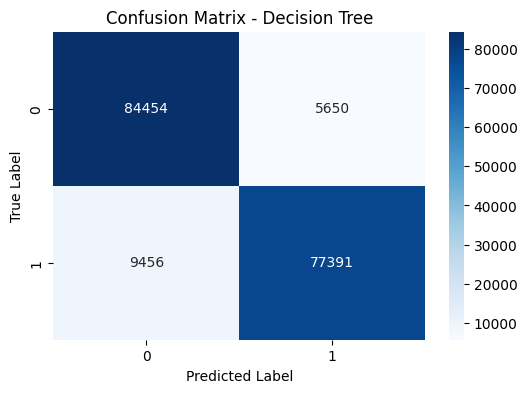


Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     90104
           1       0.93      0.89      0.91     86847

    accuracy                           0.91    176951
   macro avg       0.92      0.91      0.91    176951
weighted avg       0.92      0.91      0.91    176951



In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_predict
import seaborn as sns


dt_regressor = DecisionTreeClassifier(random_state=1)
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)


y_pred = grid_search.predict(X_test)

# Confusion Matrix
conf_mat_dt = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_mat_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print("\nClassification Report - Decision Tree:")
print(classification_report(y_test, y_pred))


Feature Importances:
nyt headline mentions (log): 0.17715723515265586
percent total population two or more races white and american indian and alaska native: 0.09699650025766215
percent citizen, voting age population citizen, 18 and over population female: 0.07820969093305505
percent total population one race asian asian indian: 0.06701738147092699
percent race alone or in combination with one or more other races total population native hawaiian and other pacific islander: 0.05239731207342895
estimate hispanic or latino and total population hispanic or latino (of any race) cuban: 0.0515907587954988
estimate hispanic or latino and total population not hispanic or latino black or african american alone (log): 0.04780035013146973
estimate total population one race american indian and alaska native chippewa tribal grouping: 0.04550925049566222
percent race alone or in combination with one or more other races total population black or african american: 0.032314864226720814
fox headline men

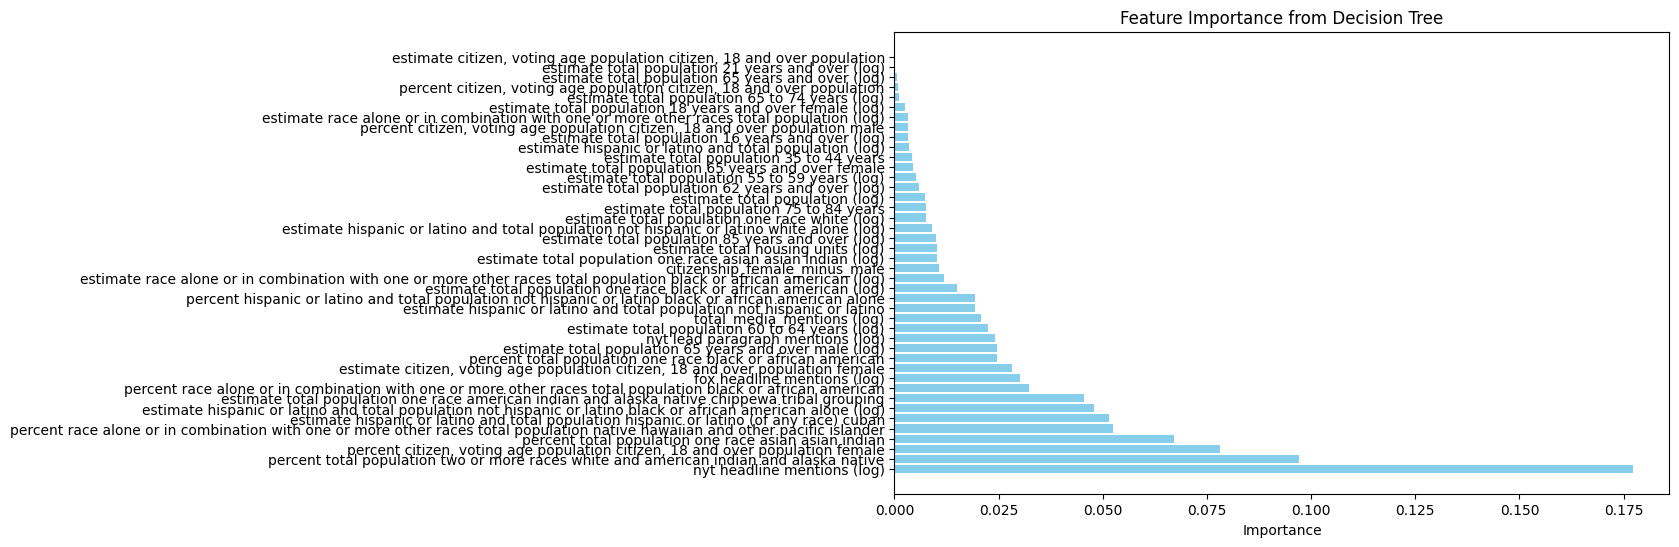

In [7]:
best_model = grid_search.best_estimator_
importance = best_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
for index, row in feature_importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']}")


plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Decision Tree')
plt.show()


## Random Forest

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

import numpy as np

# Set seed for NumPy
np.random.seed(42)


# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [5, 10, 20],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.model_selection import GridSearchCV
dt_regressor2 = RandomForestClassifier(random_state=1)
grid_search2 = GridSearchCV(estimator=dt_regressor2, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search2.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search2.best_params_)
print("Best accuracy: ", grid_search2.best_score_)


Best hyperparameters:  {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 10}
Best accuracy:  0.9182509183385138


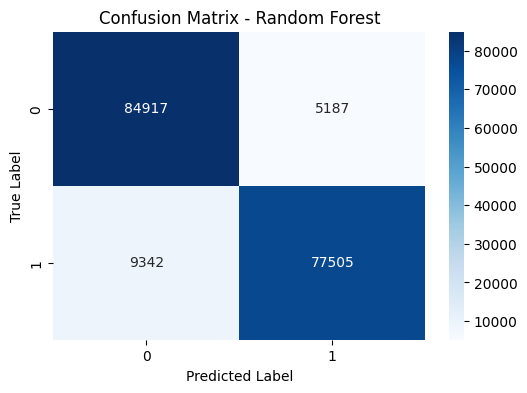


Classification Report - :
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     90104
           1       0.94      0.89      0.91     86847

    accuracy                           0.92    176951
   macro avg       0.92      0.92      0.92    176951
weighted avg       0.92      0.92      0.92    176951



In [14]:
y_pred = grid_search2.predict(X_test)

# Confusion Matrix
conf_mat_dt = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_mat_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print("\nClassification Report - :")
print(classification_report(y_test, y_pred))


Feature Importances:
nyt headline mentions (log): 0.1008005862102892
total_media_mentions (log): 0.07764142292026847
nyt lead paragraph mentions (log): 0.07678323697941332
fox headline mentions (log): 0.06191125910169561
percent total population two or more races white and american indian and alaska native: 0.042725166002700286
estimate race alone or in combination with one or more other races total population black or african american (log): 0.033539131478678694
citizenship_female_minus_male: 0.03187398468654793
percent total population one race asian asian indian: 0.029054517670020454
estimate hispanic or latino and total population not hispanic or latino white alone (log): 0.02874461769753401
percent citizen, voting age population citizen, 18 and over population male: 0.02760546857787772
estimate total population one race black or african american (log): 0.026475503709914458
percent hispanic or latino and total population not hispanic or latino black or african american alone: 0.02

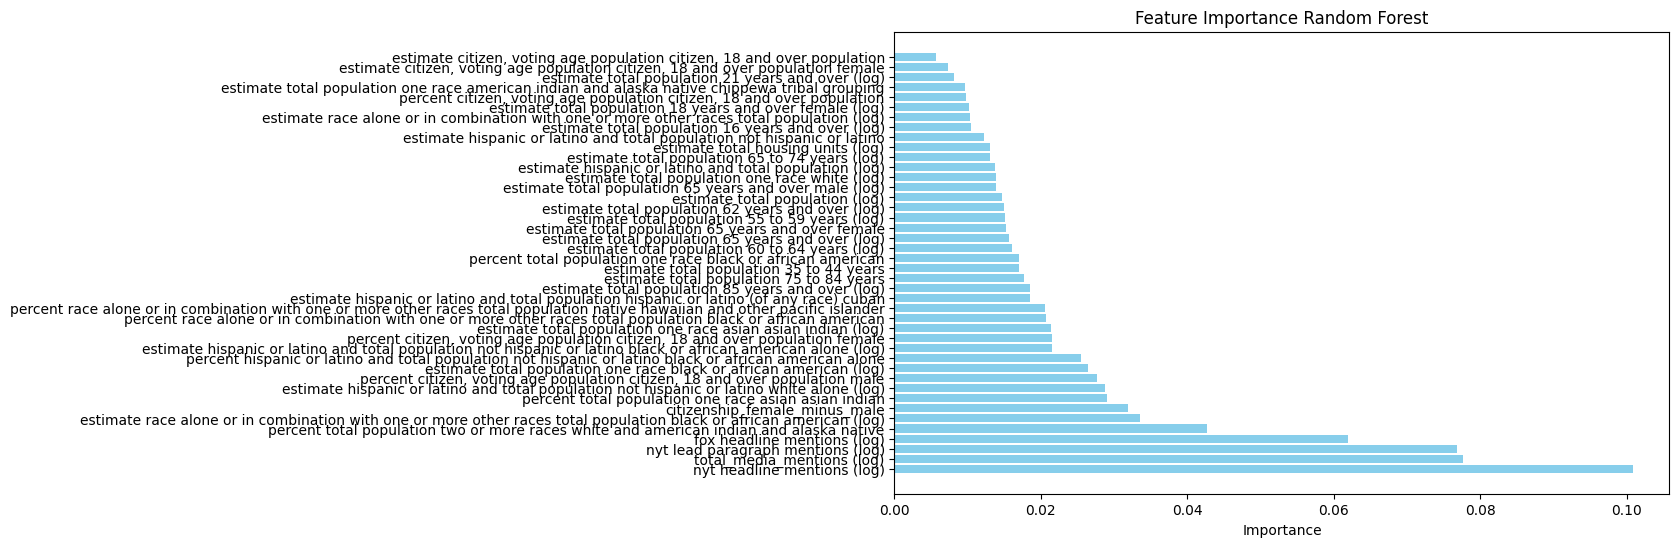

In [15]:
best_model2 = grid_search2.best_estimator_
importance = best_model2.feature_importances_
feature_importance_df2 = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
for index, row in feature_importance_df2.iterrows():
    print(f"{row['Feature']}: {row['Importance']}")


plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df2['Feature'], feature_importance_df2['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance Random Forest')
plt.show()


## Logistics Regression

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# import the class
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']

}

grid_search3 = GridSearchCV(LogisticRegression(random_state=16), param_grid, cv=5)

# Fit to training data
grid_search3.fit(X_train, y_train)

# Use the best estimator found
logreg = grid_search3.best_estimator_

y_pred = logreg.predict(X_test)

# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


/Users/limengyan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/limengyan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

array([[63033, 27071],
       [38760, 48087]])


Classification Report - :
              precision    recall  f1-score   support

           0       0.62      0.70      0.66     90104
           1       0.64      0.55      0.59     86847

    accuracy                           0.63    176951
   macro avg       0.63      0.63      0.63    176951
weighted avg       0.63      0.63      0.63    176951



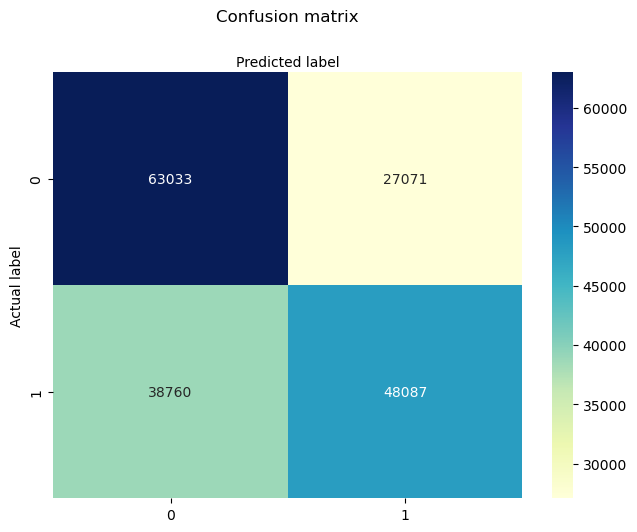

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Classification Report
print("\nClassification Report - :")
print(classification_report(y_test, y_pred))

In [ ]:

import numpy as np
importance = logreg.coef_[0]
import pandas as pd

feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', key=np.abs, ascending=False)



Feature Importances:
nyt headline mentions (log): 0.1717698861958476
percent total population two or more races white and american indian and alaska native: 0.09341416579497092
percent citizen, voting age population citizen, 18 and over population male: 0.08322948472282103
percent total population one race asian asian indian: 0.068910846805078
percent race alone or in combination with one or more other races total population native hawaiian and other pacific islander: 0.053137886379563015
estimate hispanic or latino and total population hispanic or latino (of any race) cuban: 0.05156953922097864
fox headline mentions (log): 0.04992750769972341
estimate total population one race american indian and alaska native chippewa tribal grouping: 0.045602146702988365
estimate hispanic or latino and total population not hispanic or latino black or african american alone (log): 0.037903947238079626
percent race alone or in combination with one or more other races total population black or african

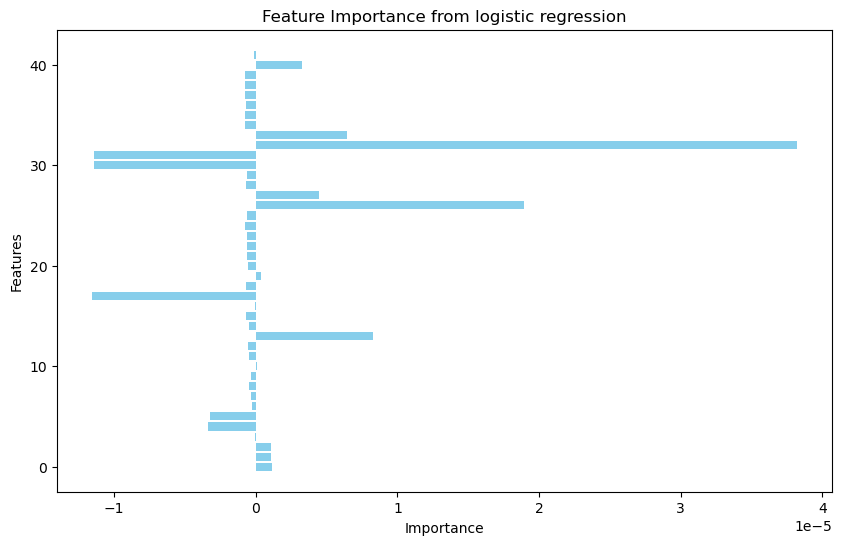

In [ ]:
print("\nFeature Importances:")
for index, row in feature_importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']}")


plt.figure(figsize=(10, 6))
plt.title("Feature Importance from logistic regression")
plt.barh(importance_df.index, importance_df["Importance"], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()